Code to achieve a completely uncorrelated distribution of the parameters on the chip.
There are 16 (25) resonators in total
In our case the parameters are (all lengths in microns):
1. frequency (inverse length), evenly spaced from 5-11 GHz
2. w+2s, with values: 10, sqrt(2)*10, 20, sqrt(2)*20, (40)
3. w/s, with values: 1/sqrt(2), 1, sqrt(2), 2, (2*sqrt(2))
4. hole separation: / (no holes), 10, 100
5. location on the chip, enumerated 1-16 (25)


In [1]:
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [3]:
p = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25] #position
f= np.linspace(5,11,25) #frequency in GHz
w2s= [10, 10*np.sqrt(2), 20, 20*np.sqrt(2), 40] #w+2s length
w2s_full= np.tile(w2s, 5) 
wsr= [1/np.sqrt(2), 1, np.sqrt(2), 2, 2*np.sqrt(2)] #w/s ratio
wsr_full= np.tile(wsr,5)
h = [0, 1/10, 1/100] #hole denisty: 1/distance of holes in the horizontal part of the resonator core.
h_full= np.append(np.tile(h,8), h[2])   #here I have chosen for the value 1/100 to be included once more than the others
                                        #0 in this case refers to no holes at all (infinite separation).
p2=np.square(p)
f2=np.square(f)
w2s_full2=np.square(w2s_full)
wsr_full2=np.square(wsr_full)
h_full2=np.square(h_full)
    
print(p)
print(f)
print(w2s_full)
print(wsr_full)
print(h_full)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[ 5.    5.25  5.5   5.75  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75
  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75
 11.  ]
[10.         14.14213562 20.         28.28427125 40.         10.
 14.14213562 20.         28.28427125 40.         10.         14.14213562
 20.         28.28427125 40.         10.         14.14213562 20.
 28.28427125 40.         10.         14.14213562 20.         28.28427125
 40.        ]
[0.70710678 1.         1.41421356 2.         2.82842712 0.70710678
 1.         1.41421356 2.         2.82842712 0.70710678 1.
 1.41421356 2.         2.82842712 0.70710678 1.         1.41421356
 2.         2.82842712 0.70710678 1.         1.41421356 2.
 2.82842712]
[0.   0.1  0.01 0.   0.1  0.01 0.   0.1  0.01 0.   0.1  0.01 0.   0.1
 0.01 0.   0.1  0.01 0.   0.1  0.01 0.   0.1  0.01 0.01]


Correlation coefficient 1.111466655301743
       0      1          2         3     4
0    1.0   8.50  40.000000  2.000000  0.10
1    2.0  10.25  20.000000  0.707107  0.10
2    3.0   5.75  14.142136  2.828427  0.00
3    4.0   6.50  28.284271  1.000000  0.01
4    5.0   9.50  10.000000  0.707107  0.01
5    6.0  10.00  40.000000  1.414214  0.00
6    7.0   6.75  28.284271  2.828427  0.01
7    8.0   7.00  20.000000  0.707107  0.00
8    9.0   7.50  10.000000  1.414214  0.10
9   10.0   5.25  14.142136  1.000000  0.00
10  11.0   8.75  14.142136  2.000000  0.00
11  12.0  10.50  14.142136  2.828427  0.10
12  13.0   6.25  10.000000  1.000000  0.01
13  14.0  10.75  40.000000  1.000000  0.01
14  15.0   9.75  10.000000  2.828427  0.00
15  16.0   9.00  20.000000  2.828427  0.10
16  17.0   8.25  28.284271  2.000000  0.00
17  18.0   7.25  20.000000  2.000000  0.00
18  19.0   5.50  28.284271  1.414214  0.01
19  20.0   6.00  10.000000  1.414214  0.10
20  21.0   7.75  20.000000  0.707107  0.10
21  22.0   5

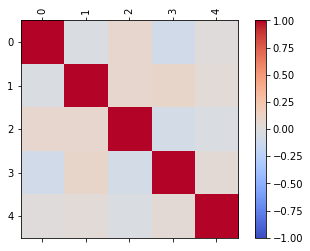

In [9]:
cc=10
while cc > 1.2: #loop that ensures that the sum of all correlation coefficients is small
    data = np.zeros((25,5))
    data[:,0] = p

    rd.shuffle(f)
    data[:,1] = f

    rd.shuffle(w2s_full)
    data[:,2] = w2s_full

    rd.shuffle(wsr_full)
    data[:,3] = wsr_full

    rd.shuffle(h_full)
    data[:,4] = h_full

    df = pd.DataFrame(data)

    corr = df.corr()
    cc=0
    for i in range(0,len(data[0])):
        for j in range(0,len(data[0])):
            if i != j:
                if abs(corr.iloc[i,j]) > 0.1: #makes sure that no individual correlation is large 
                    cc = 10
                    break
                else:
                    cc += abs(corr.iloc[i,j])
                

print("Correlation coefficient", cc)
print(df)
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

The following cell contains the code that uncorrelates the parameters not only linearly but also quadratically!

In [ ]:
cc=100
while cc > 11.5:
    data = np.zeros((25,10))

    data[:,0] = p

    rd.shuffle(f)
    data[:,1] = f

    rd.shuffle(w2s_full)
    data[:,2] = w2s_full

    rd.shuffle(wsr_full)
    data[:,3] = wsr_full
    
    rd.shuffle(h_full)
    data[:,4] = h_full
    
    rd.shuffle(p2)
    data[:,5] = p2
    
    rd.shuffle(f2)
    data[:,6] = f2
    
    rd.shuffle(w2s_full2)
    data[:,7] = w2s_full2
    
    rd.shuffle(wsr_full2)
    data[:,8] = wsr_full2
    
    rd.shuffle(h_full2)
    data[:,9] = h_full2
   
    df = pd.DataFrame(data)
    corr = df.corr()
    cc=0
    for i in range(0,len(data[0])):
        for j in range(0,len(data[0])):
            if i != j:
                if abs(corr.iloc[i,j]) > 0.2: #makes sure that no individual correlation is large 
                    cc = 100
                    break
                else:
                    cc += abs(corr.iloc[i,j])

print("Correlation coefficient", cc)
print(df)
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()